In [1]:
import numpy as np
import methods
import oracles
import plot_trajectory_2d
import matplotlib.pyplot as plt

## 2.2

Задайте две-три двумерные квадратичные функции с разными числами обусловленности. Запустите на них GD с различными стратегиями выбора шага, изобразите на графиках траектории методов и линии уровня функции. Для рисования линий уровня воспользуйтесь
функцией plot_trajectory, а для траекторий методов – функцией plot_levels из файла
plot_trajectory_2d.

In [2]:
S = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
S_2 = S(2)

In [3]:
k = 10

In [4]:
A = np.diag([1, k])
b = np.random.random(2)

In [5]:
mat_10 = S_2.dot(A).dot(S_2.T)

In [6]:
x_0 = np.array([10.0, 1.5])

iter count =  301


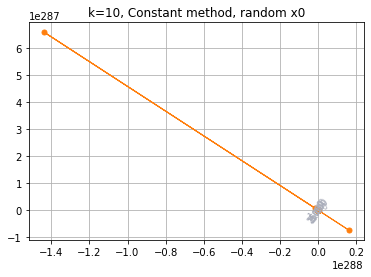

In [7]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant"})
m.run(300)
plt.title("k=10, Constant method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  38


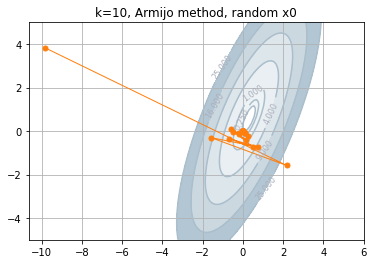

In [8]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=10, Armijo method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  5


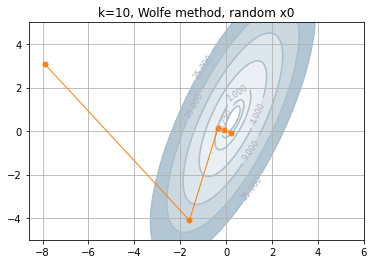

In [9]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=10, Wolfe method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

### Как зависит поведение методов от начальной точки?

In [10]:
m.hist["x_star"]

array([0.29671835, 0.56838728])

In [11]:
x_0 = np.asarray([0.3, 0.7])

iter count =  301


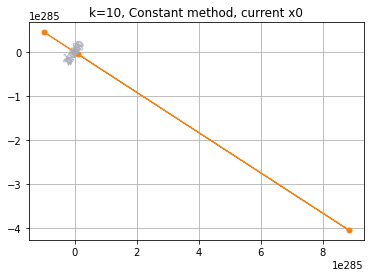

In [12]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant"})
m.run(300)
plt.title("k=10, Constant method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  40


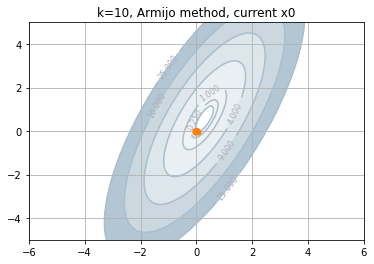

In [13]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=10, Armijo method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  3


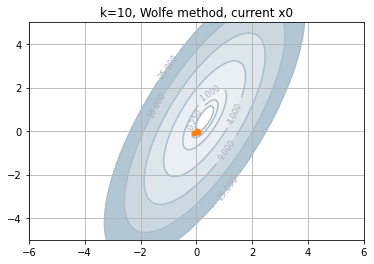

In [14]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=10, Wolfe method, current x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

Вывод: да вроде от начальной точки вообще не зависит

### Как зависит поведение методов от числа обусловленности?

In [19]:
k = 100
A = np.diag([1, k])
mat_100 = S_2.dot(A).dot(S_2.T)

iter count =  301


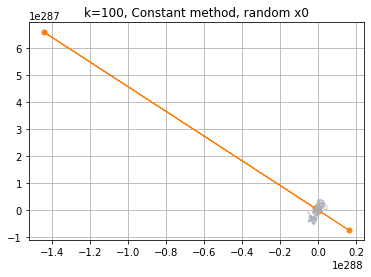

In [20]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Constant", "c": 0.1})
m.run(300)
plt.title("k=100, Constant method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  301


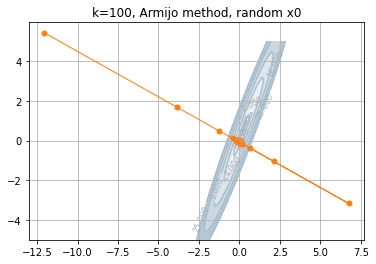

In [21]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo"})
m.run(300)
plt.title("k=100, Armijo method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  4


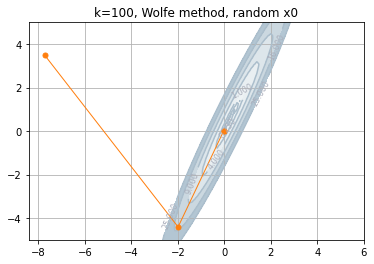

In [22]:
oracle = oracles.QuadraticOracle(mat_100, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe"})
m.run()
plt.title("k=100, Wolfe method, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

 Вывод: от числа обусловленности, можно видеть, кол-во итераций зависит как-то линейно
 
 Согласуется с выведенной формулой $$N = O(\kappa * log(\frac{1}{\varepsilon}))$$

### Как зависит поведение методов от стратегии выбора длины шага?

iter count =  96


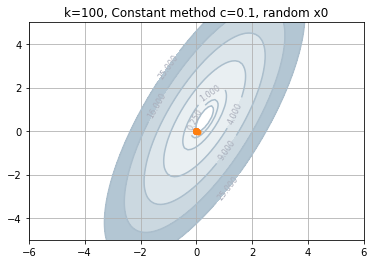

In [23]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, x_0, line_search_options={"method": "Constant", "c": 0.1})
m.run(300)
plt.title("k=100, Constant method c=0.1, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  36


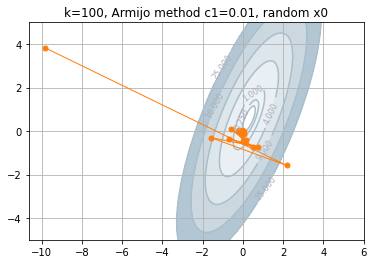

In [24]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Armijo", "c1": 1e-2})
m.run(300)
plt.title("k=100, Armijo method c1=0.01, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

iter count =  4


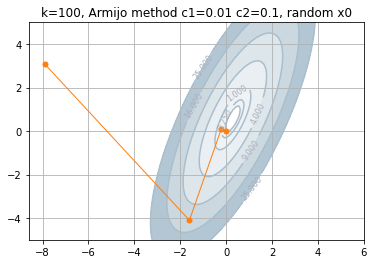

In [25]:
oracle = oracles.QuadraticOracle(mat_10, b)
m = methods.GradientDescent(oracle, np.array([10.0, 1.5]), line_search_options={"method": "Wolfe", "c1": 1e-2, "c2": 0.1})
m.run()
plt.title("k=100, Armijo method c1=0.01 c2=0.1, random x0")
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, m.hist["x"])
print("iter count = ", len(m.hist["x"]))

Вывод: от выбора длины шага зависит поведение методов, но как так сразу не понятно - нужны более глубокие исследования

## 2.3 

In [26]:
def rand_A(n, k):
    diag = [1]
    for i in range(n - 2):
        diag.append(np.random.random() * (k - 1) + 1)
    diag.append(k)
    return np.diag(diag)

In [27]:
def N_k(n, k_left=10, k_right=31, step=2, samples=100):
    """we sample random function 'samples' times and get average iterations"""
    iters = []
    for k in range(k_left, k_right, step):
        iter_sum = 0
        for j in range(samples):
            A = rand_A(n, k)
            oracle = oracles.QuadraticOracle(A, np.random.random(n))
            m = methods.GradientDescent(oracle, np.random.random(n), line_search_options={"method": "Wolfe"})
            m.run()
            iter_sum += len(m.hist["func"])
        iters.append([k, int(iter_sum / samples)])
    
    iters = np.array(iters)
    x = iters[:, 0]
    y = iters[:, 1]
    plt.plot(x, y)
    plt.xlabel("k")
    plt.ylabel("itetations")
    plt.title(f"Dimension = {n}")
    plt.show()
    
    return iters

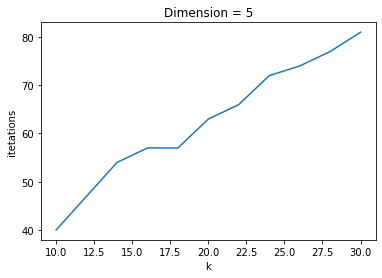

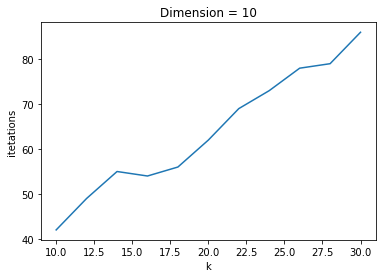

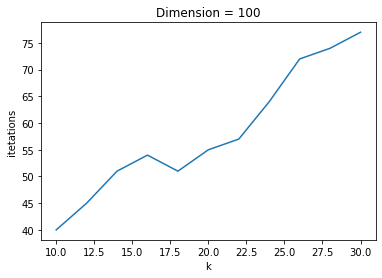

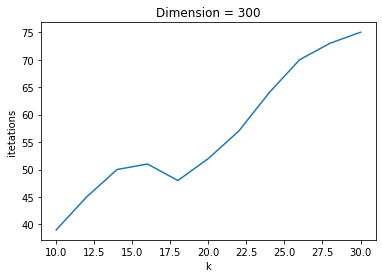

In [28]:
N_n_k = []
dims = [5, 10, 100, 300]
for i in dims:
    N_n_k.append([i, N_k(i)])

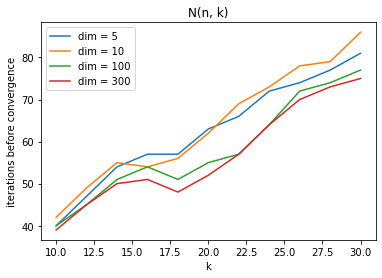

In [29]:
for k, N in N_n_k:
    plt.plot(N[:, 0], N[:, 1], label=f"dim = {k}")
plt.legend()
plt.xlabel("k")
plt.ylabel("iterations before convergence")
plt.title("N(n, k)")
plt.show()

Вывод: от размерности не видно, что зависит, да и n в формуле не фигурирует, могу лишь предполижить, что при больших размерностях мы можем столкнуться с проклятием размерности и это окажет какое-то влияние на $\frac{1}{\varepsilon}$, когда мы нормы вычисляем

От числа обусловленности зависит линейно как мы еще видели это в пункте 2.2, с теорией хорошо согласуется

## 2.4

In [30]:
from sklearn.datasets import load_svmlight_file

In [73]:
def find_iters(m, iters): 
    m.run(iters)
    while len(m.hist["func"]) > iters and iters <= 1000:
        iters *= 2
        m.run(iters)
        
    return len(m.hist["func"])

In [74]:
def datasets(file_path, n_features, run_iters=100):
    file = load_svmlight_file(file_path, n_features = n_features)
    oracle = oracles.create_log_reg_oracle(file[0], file[1], 0.5)
    
    methods_conv = {}
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Wolfe"})    
    iters = find_iters(m, run_iters)
    print(f"Wolfe method iters = {iters}")
    methods_conv["Wolfe"] = iters
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Constant"})    
    iters = find_iters(m, run_iters)
    print(f"Constant method iters = {iters}")
    methods_conv["Constant"] = iters
    
    m = methods.GradientDescent(oracle, np.zeros(n_features), line_search_options={"method": "Armijo"})
    iters = find_iters(m, run_iters)
    print(f"Armijo method iters = {iters}")
    methods_conv["Armijo"] = iters
    
    return [n_features, methods_conv]

In [75]:
methods_info = []
methods_info.append(datasets("./datasets/a9a.txt", 123))
methods_info.append(datasets("./datasets/gisette_scale.bz2", 5000))
methods_info.append(datasets("./datasets/real-sim.bz2", 20958))

Wolfe method iters = 59
Constant method iters = 59
Armijo method iters = 59
Wolfe method iters = 798
Constant method iters = 3105


KeyboardInterrupt: 

In [76]:
methods_info

[[123, {'Wolfe': 59, 'Constant': 59, 'Armijo': 59}]]

Не ну очень долго метод Армихо сходился, а сходится он не медлеленнее чем Const, пусть будет 2750 iters

In [77]:
methods_info.append([5000, {
    "Wolfe": 798,
    "Constant": 3105,
    "Armijo": 2750
}])

In [78]:
methods_info.append(datasets("./datasets/real-sim.bz2", 20958))

Wolfe method iters = 18
Constant method iters = 18
Armijo method iters = 18


In [79]:
methods_info

[[123, {'Wolfe': 59, 'Constant': 59, 'Armijo': 59}],
 [5000, {'Wolfe': 798, 'Constant': 3105, 'Armijo': 2750}],
 [20958, {'Wolfe': 18, 'Constant': 18, 'Armijo': 18}]]

In [81]:
arm = []
con = []
wol = []
x = []
for n_feat, info in methods_info:
    x.append(n_feat)
    arm.append(info["Armijo"])
    con.append(info["Constant"])
    wol.append(info["Wolfe"])

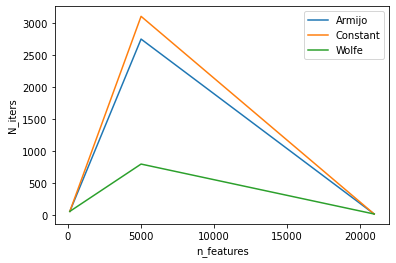

In [83]:
plt.plot(x, arm, label="Armijo")
plt.plot(x, con, label="Constant")
plt.plot(x, wol, label="Wolfe")
plt.legend()
plt.xlabel("n_features")
plt.ylabel("N_iters")
plt.show()

Вывод: от размерности не зависит, метод Вульфа сходится значитьельно лучше(ну как минимум не хуже)